In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Set random seed for reproducibility
np.random.seed(42)
# Generate sample data
data = {
'Age Group': np.random.choice(['18-25', '26-35', '36-45', '46-60'], size=100),
'Income': np.random.randint(20000, 120000, size=100),
'Spending Score': np.random.randint(1, 100, size=100)
}
# Create DataFrame
df = pd.DataFrame(data)
# Display first few rows
df.head()


,Age Group,Income,Spending Score
0,36-45,65758,44
1,46-60,92409,84
2,18-25,91211,30
3,36-45,85697,62
4,36-45,57065,75


In [5]:
summary = df.groupby('Age Group')['Income'].describe()
print(summary)


           count          mean           std      min       25%      50%  \
Age Group                                                                  
18-25       20.0  83053.850000  30924.536900  22695.0  58732.00  95393.0   
26-35       26.0  66780.653846  30907.652141  20206.0  42389.75  63071.0   
36-45       24.0  75108.708333  30968.890335  21016.0  56088.50  79689.5   
46-60       30.0  69561.566667  27153.724324  22568.0  44938.50  72624.0   

                 75%       max  
Age Group                       
18-25      107175.00  119299.0  
26-35       86683.25  118806.0  
36-45      104083.25  118018.0  
46-60       92284.25  113426.0  


In [7]:
stats = df.groupby('Age Group')['Income'].agg(['mean', 'median', 'min', 'max', 'std'])
print(stats)


                   mean   median    min     max           std
Age Group                                                    
18-25      83053.850000  95393.0  22695  119299  30924.536900
26-35      66780.653846  63071.0  20206  118806  30907.652141
36-45      75108.708333  79689.5  21016  118018  30968.890335
46-60      69561.566667  72624.0  22568  113426  27153.724324


In [11]:
age_income_list = df.groupby('Age Group')['Income'].apply(list).reset_index(name='Income List')

print(age_income_list)

  Age Group                                        Income List
0     18-25  [91211, 119299, 52606, 109812, 106807, 68984, ...
1     26-35  [114663, 29268, 32185, 59099, 28571, 58044, 82...
2     36-45  [65758, 85697, 57065, 31534, 60397, 111387, 21...
3     46-60  [92409, 112093, 75591, 43247, 44300, 94065, 83...


In [17]:
# Group by 'Age Group' and aggregate 'Spending Score'
spending_stats = df.groupby('Age Group')['Spending Score'].agg(
    Mean='mean',
    Std_Dev='std',
    Q25=lambda x: np.percentile(x, 25),
    Q75=lambda x: np.percentile(x, 75)
).reset_index()

print(spending_stats)
                                                                

  Age Group       Mean    Std_Dev    Q25    Q75
0     18-25  54.350000  26.886261  32.25  70.50
1     26-35  51.538462  31.877554  31.25  78.25
2     36-45  53.416667  32.388829  33.75  75.50
3     46-60  51.366667  30.690314  23.25  81.25


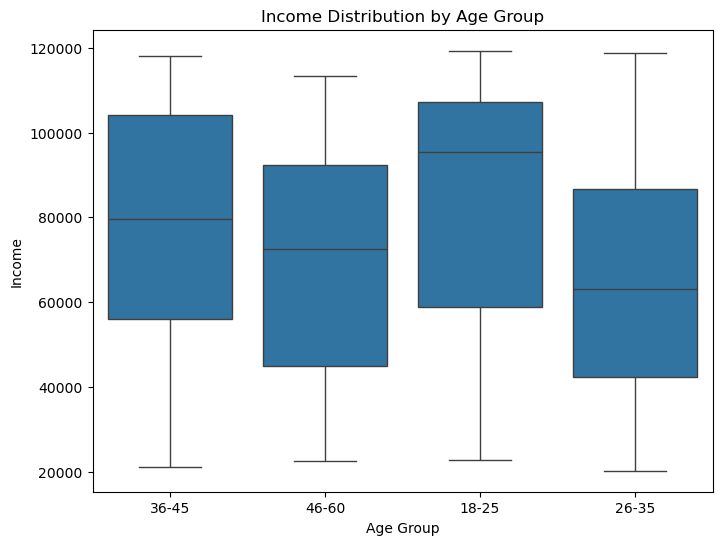

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Age Group', y='Income', data=df)
plt.title('Income Distribution by Age Group')
plt.show()


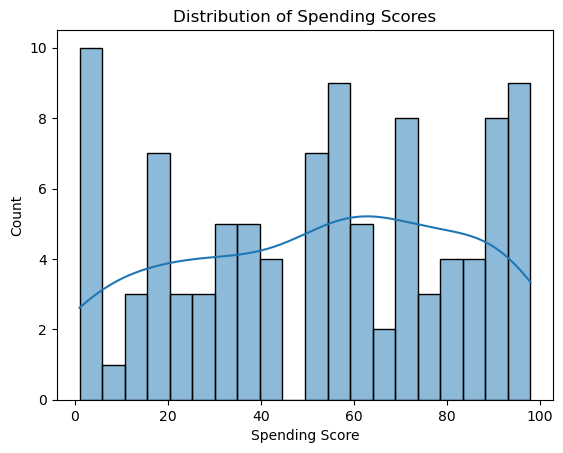

In [21]:
sns.histplot(df['Spending Score'], kde=True, bins=20)
plt.title('Distribution of Spending Scores')
plt.show()

